# 第3章 ニューラルネットワーク

## 3.2 活性化関数
各ノード（ニューロン）での発火の仕方を表す関数を活性化関数と呼ぶ．  
代表的な活性化関数としてシグモイド関数やステップ関数，ReLU関数がある．パーセプトロンは活性化関数としてステップ関数を用いるニューラルネットワークであると言える．

シグモイド関数 : $h(x) = \frac{1}{1+exp(-x)}$  
ReLU関数 : $h(x) = max(0, x)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

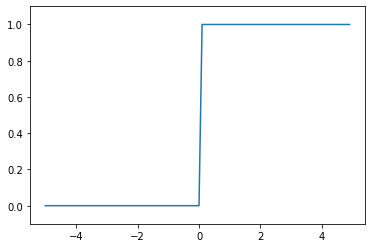

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

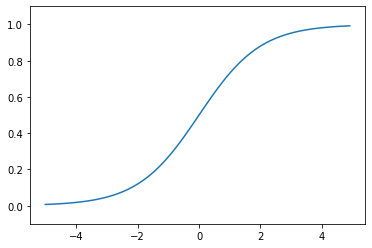

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [10]:
def relu(x):
    return np.maximum(0, x)

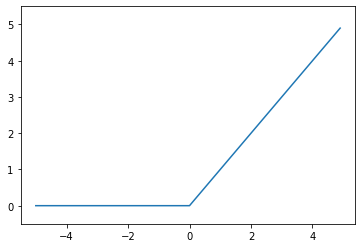

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.5, 5.5)
plt.show()

## 3.4 3層ニューラルネットワークの実装
入力2次元，中間層3次元，出力2次元の3層ニューラルネットワークを実装する．

In [21]:
def identity_function(x):
    return x

def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([0.1, 0.2])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [22]:
netwok = init_network()
x = np.array([0.1, 0.5])
y = forward(netwok, x)
print(y)

[0.31234736 0.6863161 ]


## 3.5 出力層の設計
ニューラルネットワークの出力層にソフトマックス関数を導入する．
$$
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)}
$$

In [24]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x

In [28]:
x = np.array([0.3, 2.9, 4.0])
y = softmax(x)
print(y, np.sum(y))

[0.01821127 0.24519181 0.73659691] 1.0


## 3.6 手書き文字認識
MNIST データセットの認識を行うニューラルネットワークを作成する．

In [43]:
import os
import sys
import pickle
from PIL import Image
from dataset import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_mnist(flatten=True, normalize=False)

5


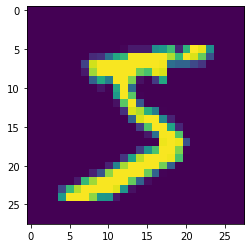

In [44]:
# 画像データの確認
img = x_train[0]
label = t_train[0]
print(label)
img = img.reshape(28, 28)
img = Image.fromarray(np.uint8(img))
plt.imshow(np.array(img))

In [49]:
def init_network():
    """ 重みの初期値を読み込む """
    with open("dataset/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
        
    return network


def predict(network, x):
    """ 推論を行う """
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [56]:
# バッチ処理を行わない場合
network = init_network()

accuracy_cnt = 0
for i in range(len(x_test)):
    y = predict(network, x_test[i])
    p = np.argmax(y)
    if p == t_test[i]:
        accuracy_cnt += 1
        
print("Accuracy : ", float(accuracy_cnt) / len(x_test))

/home/yuko/.python37-venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuracy :  0.9207


In [57]:
# バッチ処理を行う場合
batch_size = 100
network = init_network()

accuracy_cnt = 0
for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t_test[i:i + batch_size])
        
print("Accuracy : ", float(accuracy_cnt) / len(x_test))

Accuracy :  0.9207


/home/yuko/.python37-venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
